In [4]:
from pandas import read_pickle
import numpy as np
from numpy.linalg import det
import matplotlib.pyplot as plt
from math import pi, log, e

# Importing data
radiation = read_pickle('Radiation.pkl')

# Setting up arrays for time, radiation, and background radiation and error for each
t = np.arange(0,35.8167,1.35)
y = radiation['Count rate'].values*60
yerr = np.sqrt(y)

# Creating a fit line with the parameters
def fit_line(t,A1,A2,λ1,λ2,B):
    fit = A1*(e**(-λ1*t))+ A2*(e**(-λ2*t)) + B
    return fit

a1 = 3000
a2 = -2000
λ1 = 0.1
λ2 = 0.1
B = 100



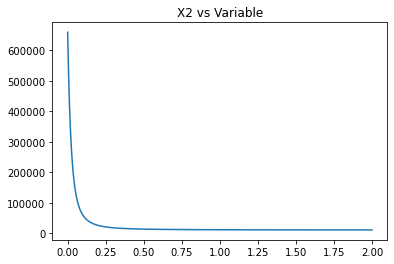

In [135]:
# This block of code was to help me make sure that my grid search program wasn't 
# finding a local minimum

a1 = linspace(4690,5000,20000)
a2 = linspace(4670,8000,20000)
λ1 = linspace(0,2,2000)
λ2 = linspace(0.1,0.2,2000)
B = linspace(600,800,2000)

chisq = array([])
for i in λ1:
    fit = fit_line(t,a1[0],a2[0],i,λ2[0],B[0])
    chi2 = sum(((y - fit)**2)/((yerr)**2))
    chisq = append(chisq, chi2)

plt.title('X2 vs Variable') # In this case its Gamma2
plt.plot(λ1,chisq)

In [164]:
Thalf = log(2)/λ1
print(Thalf)

3.465735902799726


In [5]:
# Importing data
radiation = read_pickle('Radiation.pkl')

# Setting up arrays for time, radiation, and background radiation and error for each
t = np.arange(0,35.8167,1.35)
y = radiation['Count rate'].values*60
yerr = np.sqrt(y)


# Creating a fit line with the parameters
def fit_line(t,A,λ,B):
    fit = A*(np.exp(-λ*t)) + B
    return fit


#a1  = 3000
#λ = 0.12
#B = 600


def chi_squared(y, t, A, B, λ):
    y_values=fit_line(t, A, λ, B)
    return np.sum((y-y_values)**2 / yerr**2)

def grid_search(y, t, A_range, B_range, λ_range, step_size, step_size2):
    best_params= None
    best_chi_squared = float('inf')
    
    for A in np.arange(A_range[0], A_range[1], step_size):
        for B in np.arange(B_range[0], B_range[1], step_size):
            for λ in np.arange(λ_range[0], λ_range[1], step_size2):
                
                current_chi_squared = chi_squared(y, t, A, B, λ)
                
                if current_chi_squared < best_chi_squared:
                    best_chi_squared = current_chi_squared
                    best_params = (A, B, λ)
                    
        
    return best_params, best_chi_squared

A_range=(2000, 4000)
B_range=(100,700)
λ_range=(0, 1)
step_size= 1
step_size2= .01



best_params = grid_search(y, t, A_range, B_range, λ_range, step_size, step_size2)
print("Best Parameters (A, B, λ) and Chi_Squared", best_params)

KeyboardInterrupt: 

In [44]:
Thalf = log(2)/.15
print(Thalf)

4.620981203732969


In [5]:
from multiprocessing import Pool

def fit_line(t, A, λ, B):
    return A * np.exp(-λ * t) + B

def chi_squared(params):
    A, B, λ = params
    y_values = fit_line(t, A, λ, B)
    return np.sum((y - y_values) ** 2 / yerr ** 2)

def grid_search(params):
    A_range, B_range, λ_range, step_size, step_size2 = params
    best_params = None
    best_chi_squared = float('inf')

    for A in np.arange(*A_range, step_size):
        for B in np.arange(*B_range, step_size):
            for λ in np.arange(*λ_range, step_size2):
                current_chi_squared = chi_squared((A, B, λ))
                if current_chi_squared < best_chi_squared:
                    best_chi_squared = current_chi_squared
                    best_params = (A, B, λ)

    return best_params, best_chi_squared

# Parameters
A_range = (2000, 4000)
B_range = (100, 700)
λ_range = (0, 1)
step_size = 1
step_size2 = 0.01
params = (A_range, B_range, λ_range, step_size, step_size2)

# Grid search
with Pool() as p:
    result = p.map(grid_search, [params])[0]

print("Best Parameters (A, B, λ) and Chi_Squared:", result)

In [105]:
#Grid search procedure as give in the book. 
#
#Step 1

#Line that we are trying to optimize parameters for 
def fit_line(t, A, λ, B):
    return A * (np.exp(-λ * t)) + B


#Select starting values and step sizes and calculate Chi-Squared for the parameters

start_values ={
    'A':3300,
    'B':600,
    'λ':0.01,
}

delta_values={
    'A':100,
    'B':50, 
    'λ':.01
}



#Define a Chi-Squared function
def chi_squared(y, t, A, B, λ):

    #Y-Values that we expect from the fit line
    y_values=fit_line(t, A, λ, B)
    #Returns Chi-Squared value for the initial parameter values
    return np.sum((y-y_values)**2 / yerr**2)

initial_chi_squared=chi_squared(y, t, **start_values)
print('Initial Chi Squared:', initial_chi_squared)


Initial Chi Squared: 225254.42089290585


In [106]:
#Step 2

#This function will determine whether delta should be added or subtracted to minimize Chi-Squared
def step_parameter(y, t, A, B, λ, param, delta_values):

    #Create a dictionary to store current parameter values
    params= {'A':A, 'B':B, 'λ':λ}

    #Increment a chosen parameter by +delta
    params[param] += delta_values

    #Calculated chi-squared when parameter is increased
    chi_squared_right= chi_squared(y,t, **params)
    #print("New Parameter Values if positive delta", params[param])

    #Decrement a chosen parameter by -delta
    # -= 2*delta because we already incremented our parameters by +delta
    params[param] -= 2*delta_values

    #Calculate chi-squared when parameter is decreased
    chi_squared_left= chi_squared(y,t, **params)
    #print("New Parameter Values if negative delta", params[param])
    #print("Chi-Squared Left:", chi_squared_left, "Chi-Squared Right", chi_squared_right)
    

    #Choose which chi-squared is smaller
    if chi_squared_right < chi_squared_left:
        return chi_squared_right, params[param] + 2*delta_values
    else:
        return chi_squared_left, params[param]
    
#Test for parameter A
param='A'
delta=.01

new_chi_squared, new_param_value = step_parameter(y,t,**start_values, param=param, delta_values=delta)
print("New Chi-Squared:", new_chi_squared)
print("New Value of Parameter", param, ":", new_param_value)



New Chi-Squared: 225252.94116000357
New Value of Parameter A : 3299.9900000000002


In [108]:
#Step 3
parameters = ['A', 'B']

for param in parameters:
    #Initialize variables 
    prev_chi_squared=initial_chi_squared
    #Create a copy of the start values dictionary to update with the new parameter value
    param_values=start_values.copy()
    max_iterations=10000000

    #Create a list of parameter values
    param_list=np.array(start_values[param])
    chi_list=np.array(initial_chi_squared)

    iteration=0

    #Repeat step 2 until Chi-Squared is no longer increasing
    while True:
        #Increment the parameter chosen
        new_chi_squared, new_param_value = step_parameter(y,t,**param_values, param=param, delta_values=delta)

        #Check whether Chi-Squared has increased due to parameter change
        if new_chi_squared > prev_chi_squared:
            #param_list=np.append(param_list, param_values[param])
            break
        else:
            prev_chi_squared=new_chi_squared
            param_values[param]=new_param_value
            param_list=np.append(param_list, new_param_value)
            chi_list=np.append(chi_list,new_chi_squared)



        iteration += 1

        if iteration > max_iterations:
            print("Max iterations reached")
            break

    print("Final Chi-Squared:", prev_chi_squared)
    print("Final Value of Parameter", param, ":", new_param_value)
    print(param_list)
    print(chi_list)

    last_param_values=param_list[-3:]
    last_chi_values=chi_list[-3:]

    p=np.polyfit(last_param_values, last_chi_values, 2)

    min_param_value= -p[1]/(2*p[0])

    print("Minimum", param, "value:", min_param_value)

Final Chi-Squared: 13852.808539042993
Final Value of Parameter A : 442.7200000310663
[3300.         3299.99       3299.98       ...  442.73000003  442.72000003
  442.71000003]
[225254.42089291 225252.94116    225251.46143228 ...  13852.80854858
  13852.80854122  13852.80853904]
Minimum A value: 442.71079484450433
Final Chi-Squared: 13852.808539042999
Final Value of Parameter B : -2257.2799999935132
[  600.           599.99         599.98       ... -2257.26999999
 -2257.27999999 -2257.28999999]
[225254.42089291 225252.94116    225251.46143228 ...  13852.80854858
  13852.80854122  13852.80853904]
Minimum B value: -2257.2892050873415


In [109]:
prev_chi_squared=initial_chi_squared
#Create a copy of the start values dictionary to update with the new parameter value
param_values=start_values.copy()
param='λ'
max_iterations=10000000
delta=.001
#Create a list of parameter values
param_list=np.array(start_values[param])
chi_list=np.array(initial_chi_squared)
iteration=0
#Repeat step 2 until Chi-Squared is no longer increasing
while True:
    #Increment the parameter chosen
    new_chi_squared, new_param_value = step_parameter(y,t,**param_values, param=param, delta_values=delta)
    #Check whether Chi-Squared has increased due to parameter change
    if new_chi_squared > prev_chi_squared:
        #param_list=np.append(param_list, param_values[param])
        break
    else:
        prev_chi_squared=new_chi_squared
        param_values[param]=new_param_value
        param_list=np.append(param_list, new_param_value)
        chi_list=np.append(chi_list,new_chi_squared)
    iteration += 1
    if iteration > max_iterations:
        print("Max iterations reached")
        break
print("Final Chi-Squared:", prev_chi_squared)
print("Final Value of Parameter", param, ":", new_param_value)
print(param_list)
print(chi_list)
last_param_values=param_list[-3:]
last_chi_values=chi_list[-3:]
p=np.polyfit(last_param_values, last_chi_values, 2)
min_param_value= -p[1]/(2*p[0])
print("Minimum", param, "value:", min_param_value)

Final Chi-Squared: 1590.9733856202638
Final Value of Parameter λ : 0.1230000000000001
[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122]
[225254.42089291 214114.08996434 203549.0378536  193528.13782359
 184022.01721456 175002.95547722 166444.78827526 158322.81728959
 150613.72537867 143295.49677105 1